In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# LFY031 - Introduktion till Maskininlärning
## Föreläsning 5
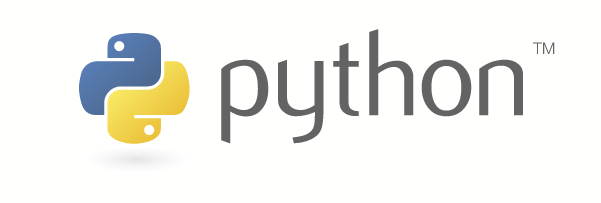
Fredrik Skärberg

#### Dagens agenda

* Frågor?
* Information om projektet i kursen.
* Introduktion till Maskininlärning (i PowerPoint)
* Regression (linjär, polynomisk, multidimensionell) med exempel
* Neurala nätverk - bygga ett eget nätverk
* Exempel på ett neuralt nätverk för försäkringsprediktion (i mån om tid)
* Genomgång av laboration 5
* Ett quiz på mentimeter.
    * Gå till www.menti.com och skriv in koden **8844 4412**

# 1. Maskininlärning
Vad är maskininlärning?

En typ av algoritmer som lär sig från erfarenheter. Istället för att en individ med expertkunskap skapar en komplex algoritm som löser ett problem så låter vi algoritmen lära sig själv från data.

![MLDL](../images/mldl.png)

![AI](../images/ai.png)

# Artificiella neurala nät
Har de senaste åren skapat en revolution i vad vi kan göra med maskininlärning.

## 1.1 Vanliga problem

### 1.1.1 Regression
Hitta en modell som beskriver beroendet av en storhet på en annan.

Linjär regresion | Icke-linjär regression
- | -
![Regresion](../images/linear_regression.png) | ![OD](../images/OD.png)



### 1.1.2 Klassificering
>**Exempel**
>
>Bildanalys

Känna igen siffror | Typ av objekt på pixel-nivå
- | -
![MNIST](../images/mnist.png) | ![semseg](../images/semseg.gif)

### 1.1.3 Beslut
>**Exempel**
>
>Reinforcement learning

AlphaGo | .
- | -
![alphago](../images/go.jpeg) | ![sabaki](../images/sabaki.png)

### 1.1.4 Generera/transformera bilder och skapa ny data
>**Exempel**
>Generative adveserial networks


Exempel på genererad data | Transformerad data
- | -
![goodfellow_gan_examples](../images/goodfellow_gan_examples.jpg) | ![style](../images/neural-style-transfer.jpg)

StyleGAN | Genererad person
- | -
![StyleGAN](../images/stylegan.png) | ![GAN](../images/person.jpeg)
[thispersondoesnotexist.com](https://thispersondoesnotexist.com/)

GPT-2 | Genererad text
- | -
![GPT](../images/gptmodel.png) | ![GPT](../images/gpt.png)
[talktotransformer](https://app.inferkit.com/demo)

### Neurala nätverk tar inspiration från mänsklig anatomi, på bilden ett gäng nervceller.
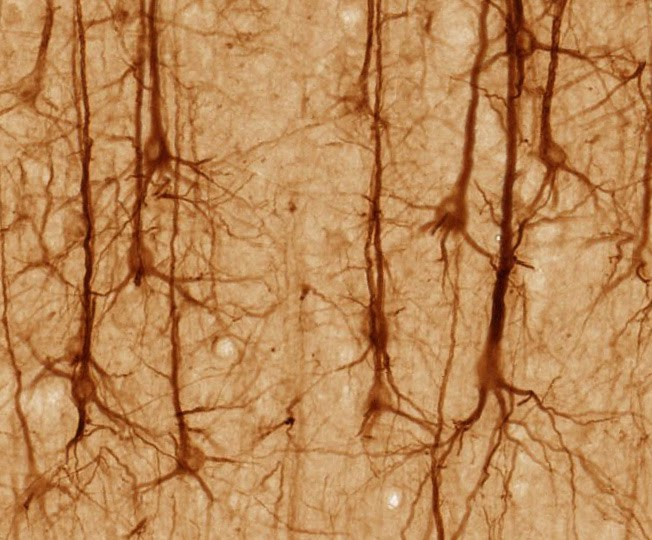

# Artificiella neurala nät
Ett sätt att bygga upp en funktion så att den kan lära sig från data. De flesta funktioner som modelleras med hjälp av ANN är av typen 
$$f: \mathbb{R}^n \rightarrow \mathbb{R}^k $$
Med andra ord så tar sådana funktioner som indata ett eller flera tal och ger tillbaka ett eller flera tal.
![ANN](../images/neural_net.svg.png)

## Artificiell neuron - byggsten i neurala nät
$$ \mathbb{R}^n \longrightarrow \mathbb{R} $$
$$ y(x_1, x_2, \cdots, x_n) = f\left( \sum_i w_i x_i + b \right) $$
$$ = f\left( w_1 x_1 + w_2 x_2 + ... + b \right) $$

- $w_i$ kallas **weights** eller **vikter**
- $b$ kallas **bias**.
- $f$ kallas **activation function** eller **aktiveringsfunktion**

![test](../images/artificial_neuron.png)



# Exempel på artificiell neuron
Låt oss skapa en artificiell neuron
$$ y(x) = w \cdot x + b $$
Notera att aktiveringsfunktionen här är identitetsfunktionen $f(x) = x$.

In [3]:
# Skapa en neuron som ovan med ett tal som indata och ett tal som utdata
neuron = torch.nn.Linear(1,1)
# Välj vikt och bias så att neuronen motsvarar funktionen y(x) = 2 * x + 5
with torch.no_grad():
    neuron.weight[0] = 2.0
    neuron.bias[0] = 5.0
# Evaluera neuronen på talet 1
result = neuron(torch.tensor([1.0]))
print(result)

tensor([7.], grad_fn=<ViewBackward0>)


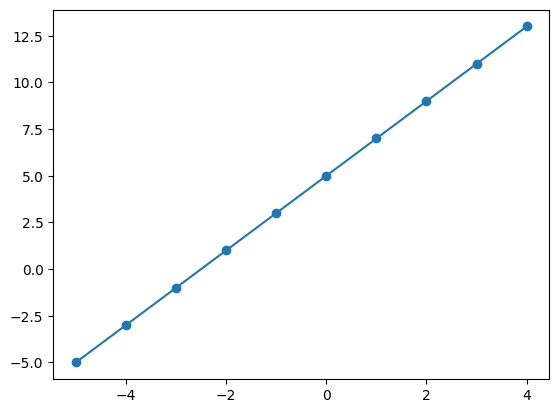

In [5]:
xs = np.arange(-5., 5.)
ys = []

for x in xs:
    x_tensor = torch.tensor([x]).float()
    y_tensor = neuron(x_tensor)
    ys.append(y_tensor[0].detach())

plt.plot(xs, ys, '-o')
plt.show()

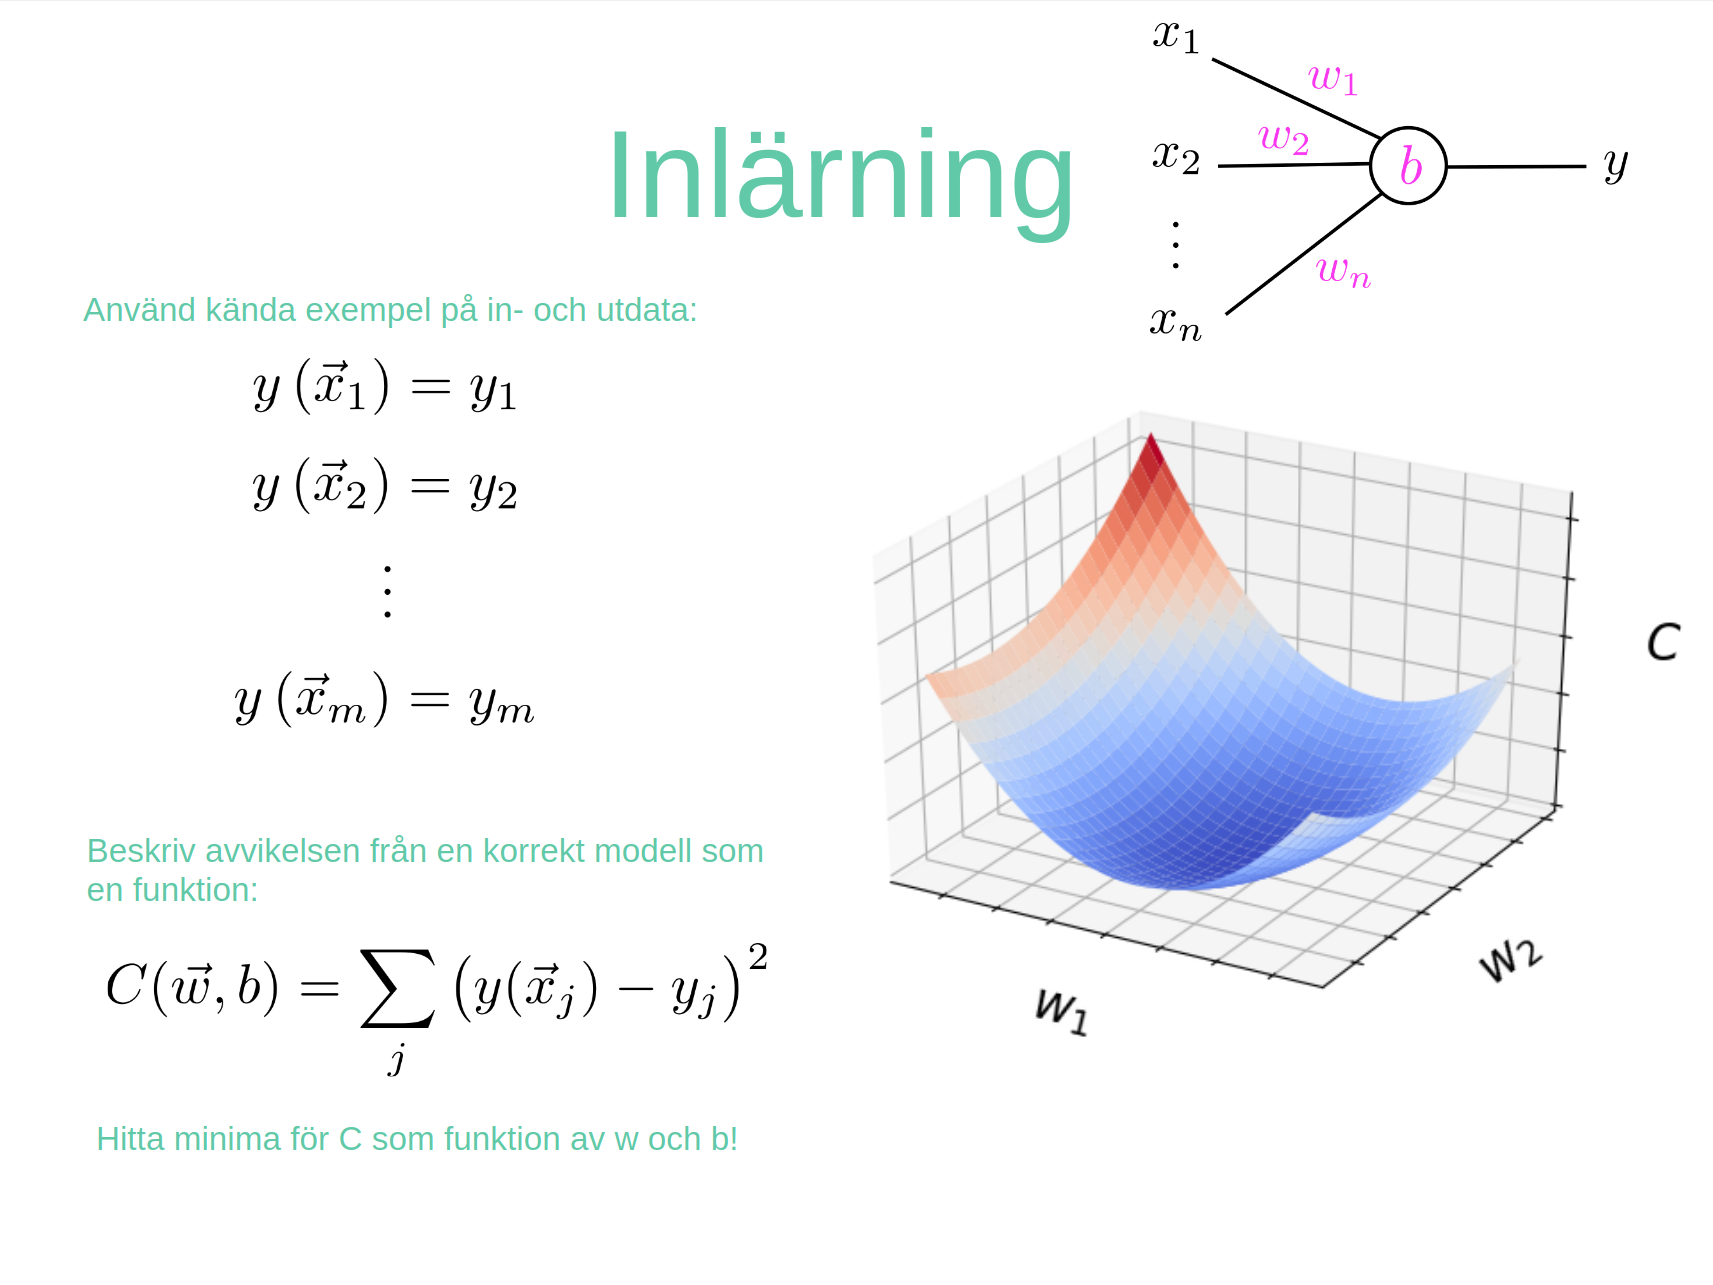

![SGD](../images/sgd2.png)

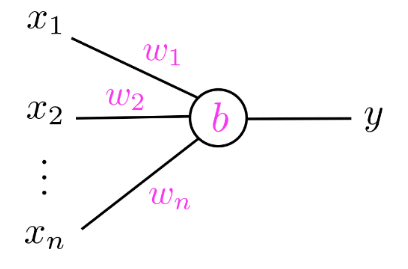

$$ C(w) = \big(y(x_1, w) - y_1\big)^2 + \big(y(x_2, w) - y_2\big)^2 + \ldots$$

### Optimeringen sker på ett högdimensionellt rum och vi tar steg i riktningen mot minima
![SGD](../images/Gradient_descent.gif)

### Låt oss nu gå vidare och se hur vi kan sätta upp en "träning" för ett neuralt nätverk.
Hur kan vi istället optimera våra vikter och biaser till datan?

Text(0, 0.5, 'y')

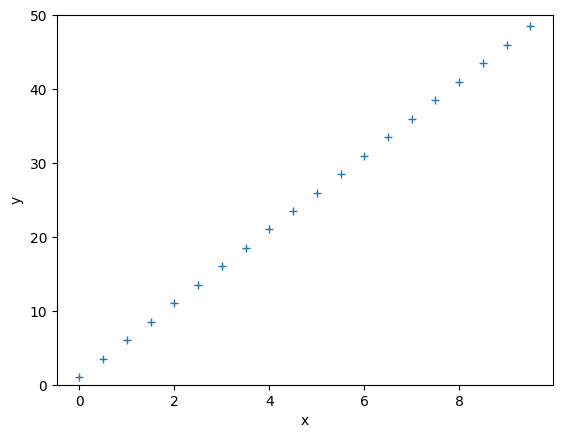

In [7]:
# Funktion som vi vill efterlikna med en neuron
def f(x):
    return 5*x + 1

# Skapa en lista med x och f(x) för funktionen f
xdata = np.arange(0, 10, 0.5) # Tal från 0 till 10 med mellanrum 0.5
ydata = []

for x in xdata:
    ydata.append(f(x))

plt.plot(xdata, ydata, '+')
plt.ylim([0, 50])
plt.xlabel("x")
plt.ylabel("y")

In [8]:
#Vår modell
model = torch.nn.Linear(1,1)

#En optimerare. SGD står för stochastic gradient descent.
optimerare = torch.optim.SGD(model.parameters(), lr=0.001)
epoker = 200
fel_per_epok = []

#Träningsloop
for omgång in range(epoker):
    totalt_fel = 0.0
    
    # Gå igenom all data
    for x, ytarget in zip(xdata, ydata): 
        
        # Konvertera värdet till en torch tensor
        xtensor = torch.Tensor([x])
        
        # Evaluera modellen på talet
        y = model(xtensor)
        
        # Beräkna felet
        fel = abs(y - ytarget)
        
        # Summera felet för kontroll
        totalt_fel += float(fel)
        
        # Nollställ gradienter för optimerare
        optimerare.zero_grad()    
        
        # Beräkna gradienter från felet
        fel.backward()
        
        # Uppdatera gradienterna ett litet steg mot en bättre lösning
        optimerare.step()
        
    #Spara felet för att plotta
    fel_per_epok.append(totalt_fel)
        
    if omgång % 50 == 0:    
        print("Omgång ", omgång, ", fel: ", float(totalt_fel))
    

Omgång  0 , fel:  426.50109934806824
Omgång  50 , fel:  7.468899607658386
Omgång  100 , fel:  4.108139455318451
Omgång  150 , fel:  1.3681203722953796


Text(0, 0.5, 'Fel')

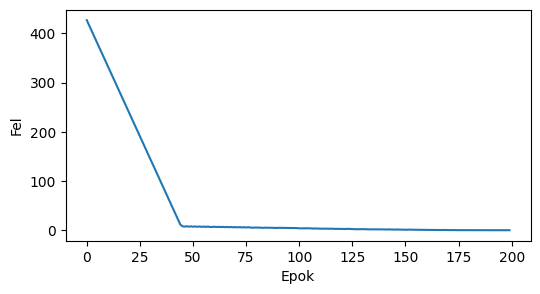

In [9]:
#Se att felet minskar desto längre vi tränar
plt.figure(figsize = (6, 3))
plt.plot(np.arange(0, len(fel_per_epok)), fel_per_epok)
plt.xlabel('Epok')
plt.ylabel('Fel')

k =  tensor([5.0038], grad_fn=<SelectBackward0>)
a =  tensor(1.0022, grad_fn=<SelectBackward0>)


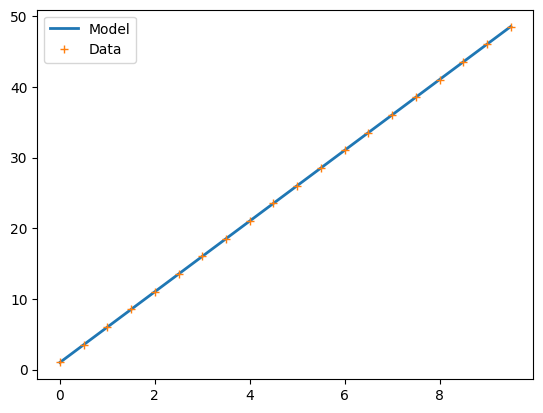

In [10]:
#Vi har lyckats approximera vår funktion.
ymodel = []
for x in xdata:
    xtensor = torch.Tensor([x])
    ymodel.append(float(model(xtensor)))
                  
plt.plot(xdata, ymodel, label="Model", linewidth=2)
plt.plot(xdata, ydata, "+", label="Data")
plt.legend()

print("k = ", model.weight[0])
print("a = ", model.bias[0])

## Data med brus

Låt oss kolla på lite data med brus istället

Text(0, 0.5, 'y')

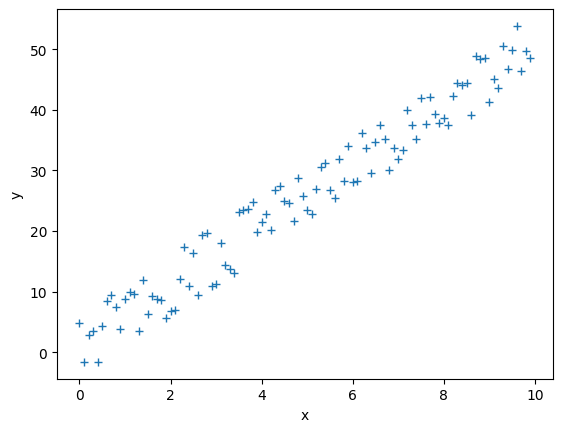

In [11]:
import random

# Funktion som vi vill efterlikna med en neuron
def f(x):
    return 5*x + 1

# Skapa en lista med x och f(x) för funktionen f
xdata = np.arange(0, 10, 0.1)
ydata = [f(x) + random.uniform(-5, 5) for x in xdata]

plt.plot(xdata, ydata, '+')
plt.xlabel("x")
plt.ylabel("y")

In [12]:
model = torch.nn.Linear(1,1)

#En optimerare. SGD står för stochastic gradient descent.
optimerare = torch.optim.SGD(model.parameters(), lr=0.001)

epoker = 100
fel_per_epok = []

for omgång in range(epoker):
    totalt_fel = 0.0
    
    # Gå igenom all data
    for x, ytarget in zip(xdata, ydata):
        # Konvertera värdet till en torch tensor
        xtensor = torch.Tensor([x])
        
        # Evaluera modellen på talet
        y = model(xtensor)
        
        # Beräkna felet
        fel = (y - ytarget)**2
        
        # Summera felet för kontroll
        totalt_fel += float(fel)
        
        # Nollställ gradienter för optimerare
        optimerare.zero_grad()    
        
        # Beräkna gradienter från felet
        fel.backward()
        
        # Uppdatera gradienterna ett litet steg mot en bättre lösning
        optimerare.step()
    fel_per_epok.append(totalt_fel)
    
    if omgång % 10 == 0:    
        print("Omgång ", omgång, ", fel: ", float(totalt_fel))

Omgång  0 , fel:  6995.440566789359
Omgång  10 , fel:  1031.553780823946
Omgång  20 , fel:  1030.4397517272737
Omgång  30 , fel:  1029.9935110950028
Omgång  40 , fel:  1029.821441950975
Omgång  50 , fel:  1029.7592405198375
Omgång  60 , fel:  1029.7403799830936
Omgång  70 , fel:  1029.7369495541789
Omgång  80 , fel:  1029.7384979536291
Omgång  90 , fel:  1029.7408804773913


Text(0, 0.5, 'Fel')

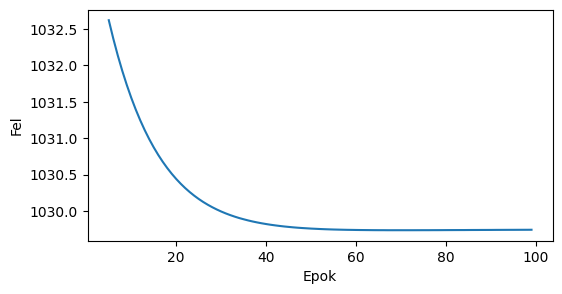

In [15]:
#Se att felet minskar desto längre vi tränar
k=5
plt.figure(figsize = (6, 3))
plt.plot(np.arange(k, len(fel_per_epok)), fel_per_epok[k:])
plt.xlabel('Epok')
plt.ylabel('Fel')

k =  tensor([4.9170], grad_fn=<SelectBackward0>)
a =  tensor(1.4665, grad_fn=<SelectBackward0>)


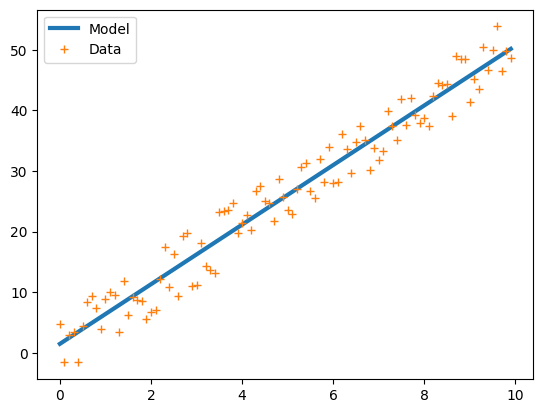

In [16]:
ymodel = []
for x in xdata:
    xtensor = torch.Tensor([x])
    ymodel.append(float(model(xtensor)))
                  
plt.plot(xdata, ymodel, label="Model", linewidth=3)
plt.plot(xdata, ydata, "+", label="Data")
plt.legend()

print("k = ", model.weight[0])
print("a = ", model.bias[0])

Okej, men om vi har något som är icke-linjärt istället?

In [18]:
def träna(xdata, ydata, model, optimerare, epoker=1000):
    
    fel_per_epok = []
    for omgång in range(epoker):
        totalt_fel = 0.0
        for x, ytarget in zip(xdata, ydata): 
            xtensor = torch.Tensor([x])
            y = model(xtensor)
            
            # Beräkna felet
            fel = abs(y - ytarget)
            
            # Summera felet för kontroll
            totalt_fel += float(fel)
            
            # Nollställ gradienter för optimerare
            optimerare.zero_grad()    
            
            # Beräkna gradienter från felet
            fel.backward()
            
            # Uppdatera parametrarna i modellen (dvs w och b) ett litet steg mot en bättre lösning
            # med hjälp av gradienterna
            optimerare.step()
            
        fel_per_epok.append(totalt_fel)
        
        if omgång % 50 == 0:    
            print("Omgång ", omgång, ", fel: ", float(totalt_fel))
    
    print(f"Fel sista epoken: {float(totalt_fel)}")
    
    return fel_per_epok

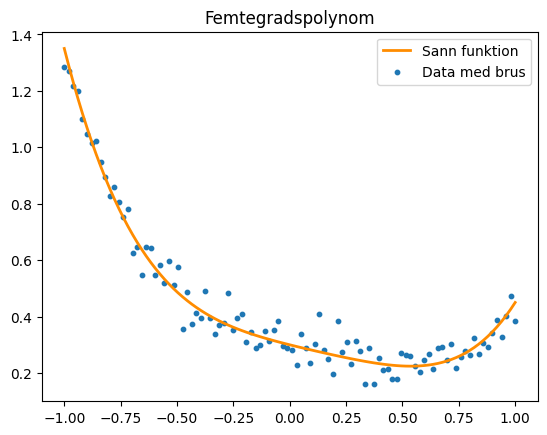

In [19]:
# Skapa inputvärden mellan -1 och 1
xdata = torch.linspace(-1, 1, 100)

# Polynom: y = 0.5*x^4 - 0.25*x^3 + 0.1*x^2 - 0.2*x + 0.3
ydata = 0.5 * xdata**4 - 0.25 * xdata**3 + 0.1 * xdata**2 - 0.2 * xdata + 0.3

# Lägg till lite brus om du vill ha mer realistisk träning
noise = torch.randn(xdata.size()) * 0.05
ydata_noisy = ydata + noise

# Rita upp
plt.plot(xdata, ydata, label="Sann funktion", color='darkorange', linewidth=2)
plt.scatter(xdata, ydata_noisy, s=10, label="Data med brus")
plt.legend()
plt.title("Femtegradspolynom")
plt.show()

In [20]:
model = torch.nn.Linear(1,1) # Skapa en linjär modell med en indata och en utdata
optimerare = torch.optim.Adam(model.parameters(), lr=1e-3)

epoker = 250

#Träna modellen
fel_per_epok = träna(xdata, ydata, model, optimerare, epoker)

Omgång  0 , fel:  60.16190406680107
Omgång  50 , fel:  13.08999714255333
Omgång  100 , fel:  13.090012043714523
Omgång  150 , fel:  13.090021640062332
Omgång  200 , fel:  13.090021431446075
Fel sista epoken: 13.090021550655365


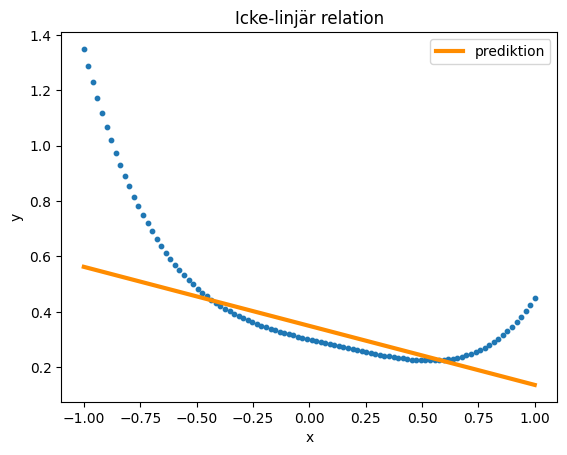

In [21]:
ymodel = []
for x in xdata:
    xtensor = torch.Tensor([x])
    ymodel.append(float(model(xtensor)))

plt.scatter(xdata, ydata, s=10)
plt.plot(xdata, ymodel, color='darkorange', linewidth=3, label='prediktion')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Icke-linjär relation')
plt.show()

## Bygga icke-linjära nätverk

För att kunna anpassa till den nya funktionen behöver vi uppdatera modellen.

In- och utdata är fortfarande ett tal så vi måste börja med en neuron som tar in ett tal och sluta med en neuron, men däremellan kan nätverket se väldigt olika ut.

Hur kan olika neurala nät se ut som tar in ett tal och ger tillbaka ett tal som utdata? Nedan är några exempel 

Notera att till vänster är Python kod för att skapa modellen där `torch.nn` är borttaget, så t.ex för att skapa andra exemplet så behöver du skriva `torch.nn.Sequential( torch.nn.Linear(1,1), torch.nn.Linear(1,1))`.

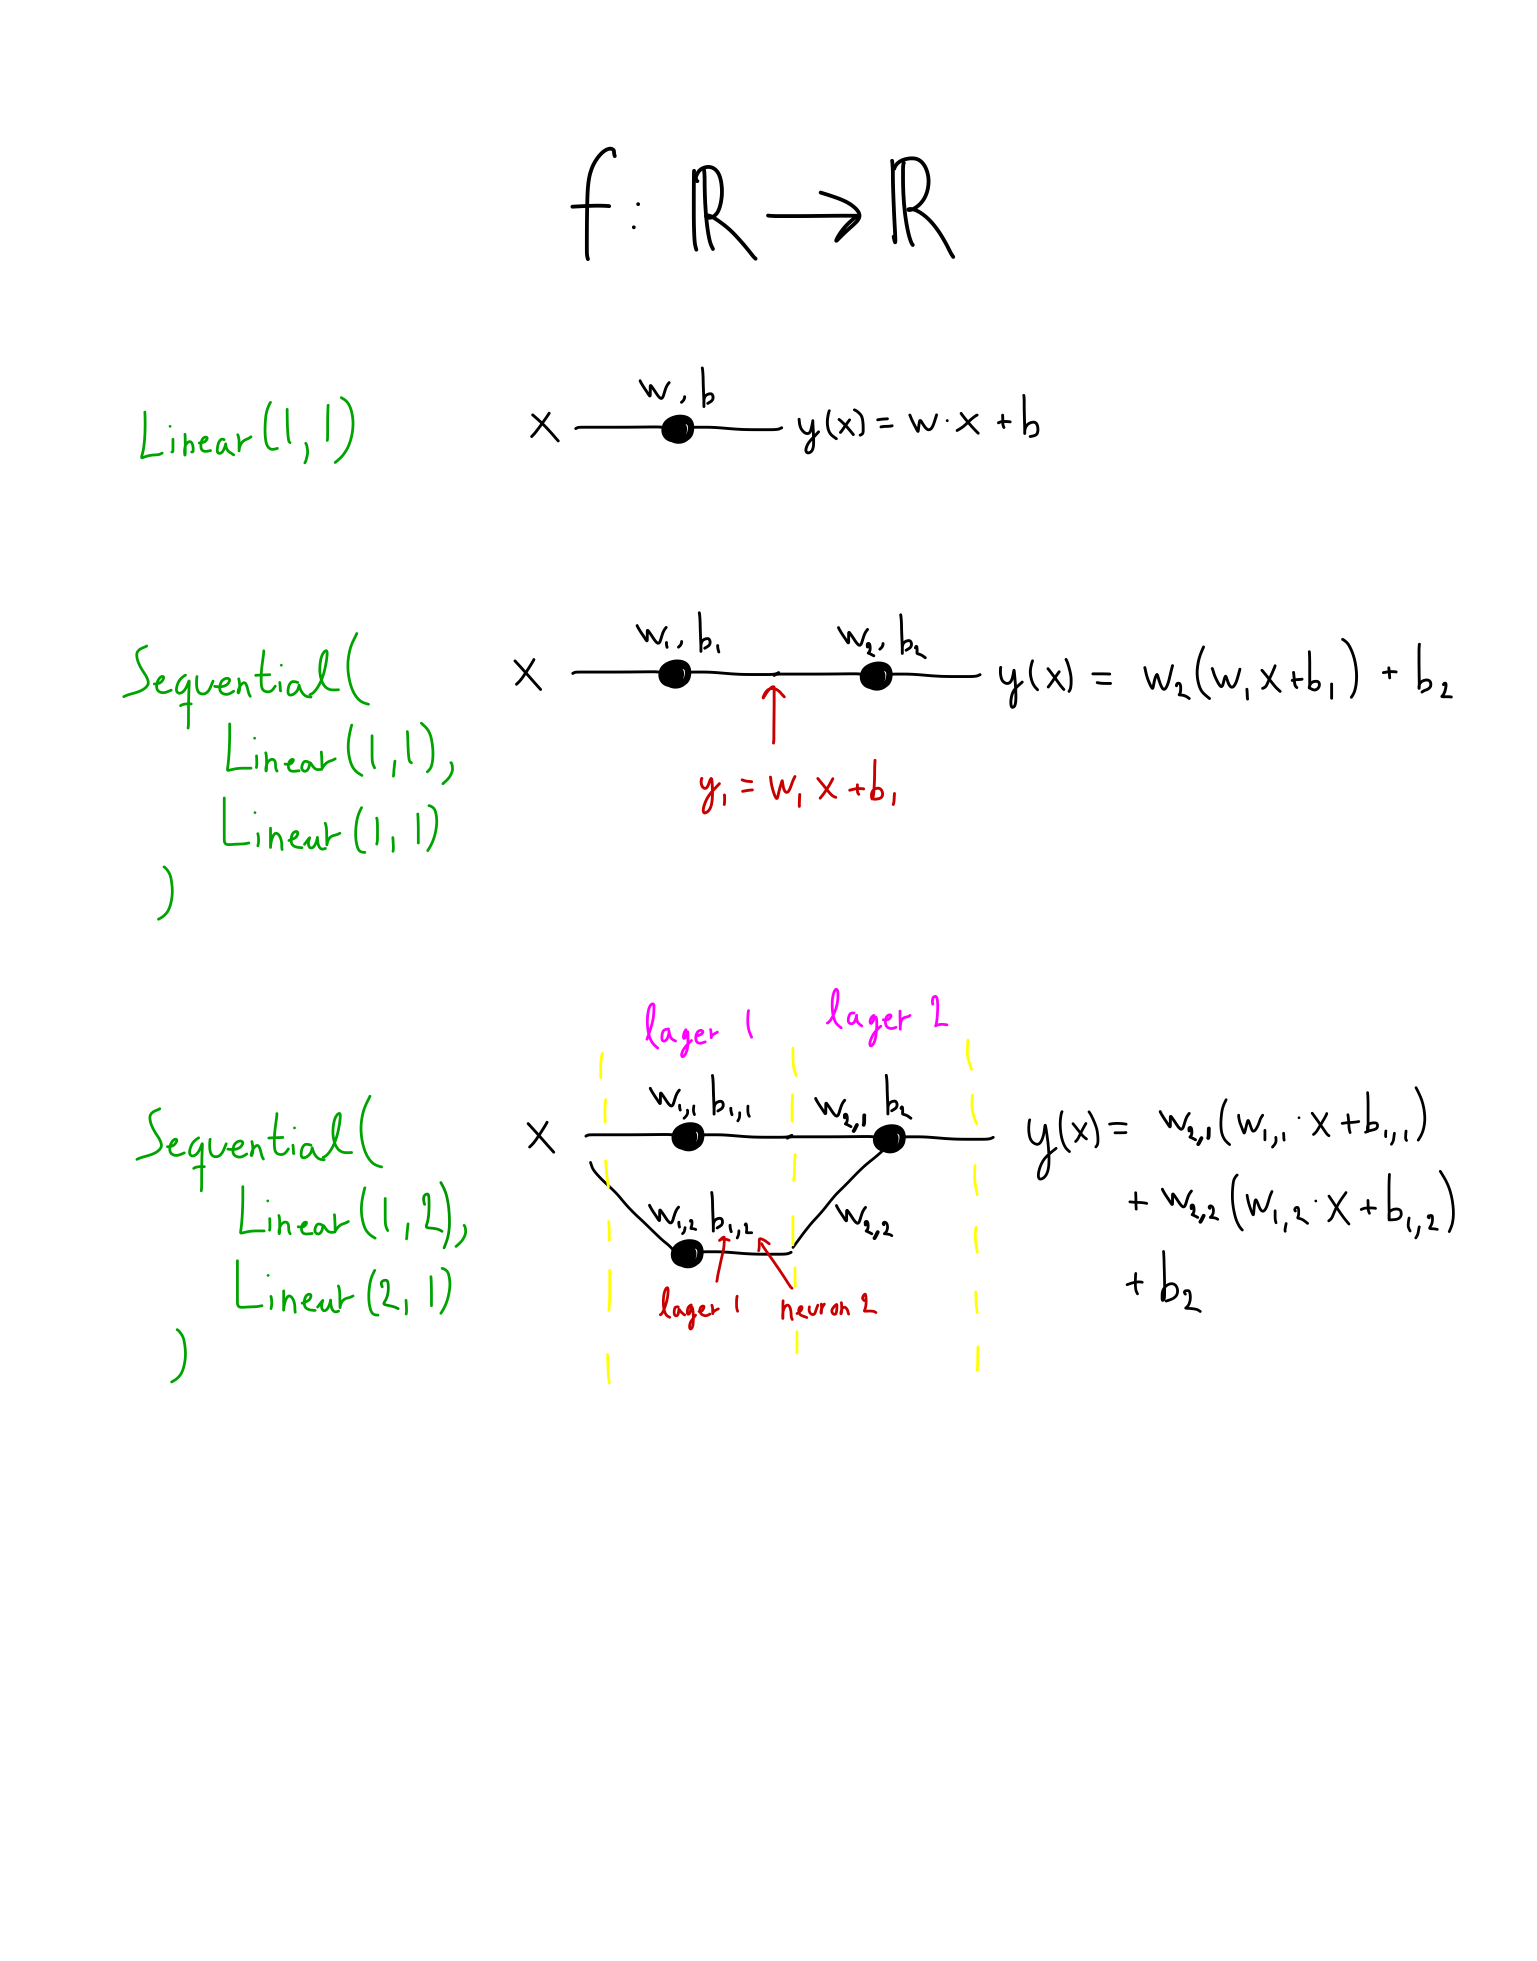

I alla dessa exempel så beskriver hela nätverket tillsammans alltid en linjär funktion, dvs hela nätverket kan beskrivas som $y(x) = w * x + b$. 

För att kunna skapa något icke-linjärt behöver vi introducera aktiveringsfunktioner. En enkel, men även extremt användbar sådan, är 
$$ 
\text{ReLU}(x) = \begin{cases}
x & x > 0 \\
0 & x \leq 0
\end{cases}
$$

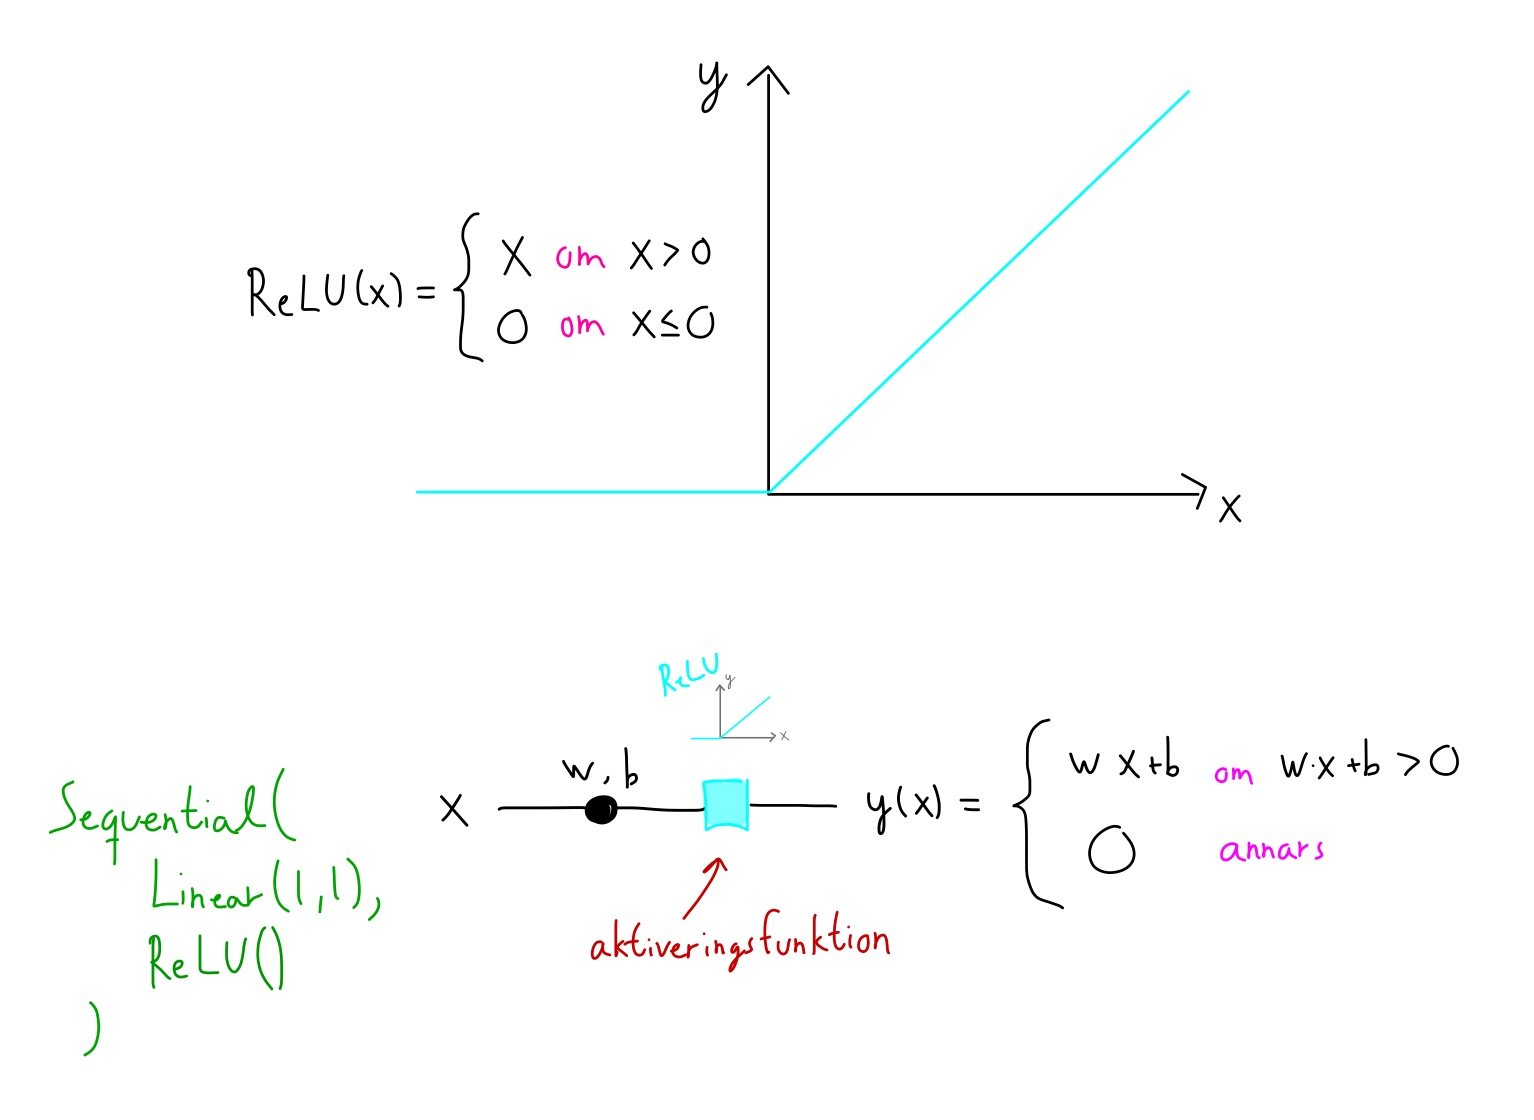

Genom att lägga till en aktiveringsfunktion efter varje neuron så kan vi beskriva mycket mer komplicerade funktioner!
T.ex kan det se ut som

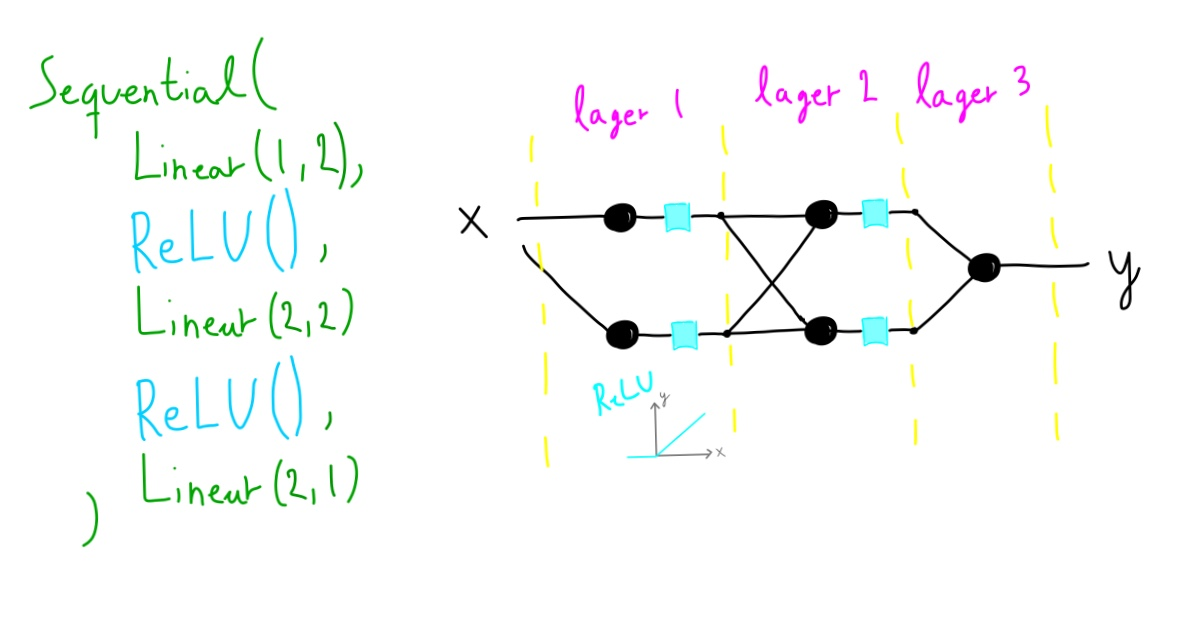

Så låt oss implementera det neurala nätverket ovan!

In [23]:
model = torch.nn.Sequential(
    torch.nn.Linear(1,2), 
    torch.nn.ReLU(), 
    torch.nn.Linear(2,2), 
    torch.nn.ReLU(), 
    torch.nn.Linear(2,1)
    )

In [24]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 13


In [25]:
optimerare = torch.optim.Adam(model.parameters(), lr=1e-3)

#Träna modellen
fel_per_epok = träna(xdata, ydata, model, optimerare, epoker=epoker)

Omgång  0 , fel:  29.43246592581272
Omgång  50 , fel:  6.8639107793569565
Omgång  100 , fel:  6.412913009524345
Omgång  150 , fel:  6.327883765101433
Omgång  200 , fel:  6.187374636530876
Fel sista epoken: 6.219533130526543


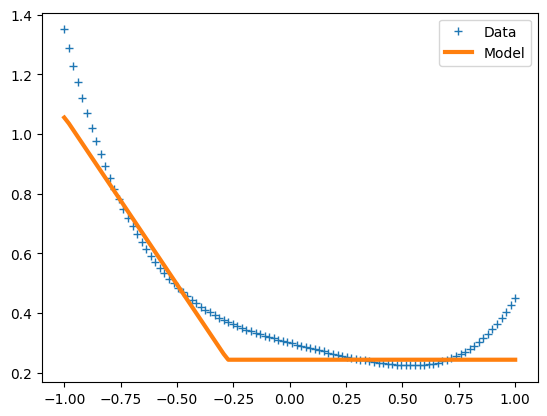

In [26]:
ymodel = []
for x in xdata:
    xtensor = torch.Tensor([x])
    ymodel.append(float(model(xtensor)))
                  
plt.plot(xdata, ydata, "+", label="Data")
plt.plot(xdata, ymodel, label="Model", linewidth=3)
plt.legend()


Okej, kanske inte helt optimalt än? Vi kan förbättra modellen genom att experimentera med:
>
> - Antalet neuroner i varje lager  
> - Antalet lager i modellen  
> - Aktiveringsfunktioner (t.ex. ReLU, Tanh, Sigmoid)  
> - Inlärningshastigheten (learning rate)  
> - Antalet epoker (hur många gånger vi tränar på hela datan)

Små justeringar kan ibland göra stor skillnad — testa dig fram och se vad som händer!

---


In [27]:
N = 16
#4 lager, varav 2st "gömda" med 16 neuroner.
model = torch.nn.Sequential(
    torch.nn.Linear(1,N), 
    torch.nn.ReLU(), 
    torch.nn.Linear(N,N), 
    torch.nn.ReLU(),
    torch.nn.Linear(N,N), 
    torch.nn.ReLU(),
    torch.nn.Linear(N,1)
    )

In [28]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 593


In [29]:
optimerare = torch.optim.Adam(model.parameters(), lr=1e-3)

#Träna modellen
fel_per_epok = träna(xdata, ydata, model, optimerare, epoker=epoker)

Omgång  0 , fel:  22.501716509461403
Omgång  50 , fel:  2.125958099961281
Omgång  100 , fel:  1.4076181203126907
Omgång  150 , fel:  2.1746974885463715
Omgång  200 , fel:  1.6527618020772934
Fel sista epoken: 0.9895757585763931


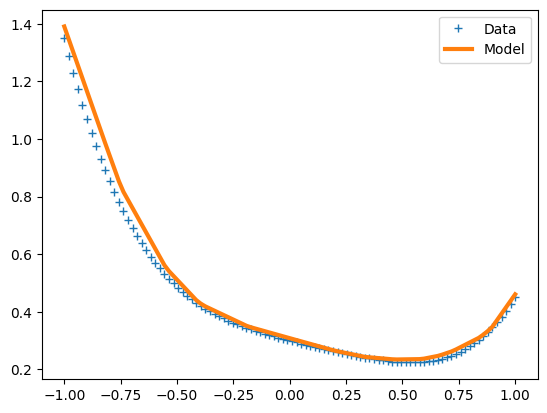

In [30]:
ymodel = []
for x in xdata:
    xtensor = torch.Tensor([x])
    ymodel.append(float(model(xtensor)))
                  
plt.plot(xdata, ydata, "+", label="Data")
plt.plot(xdata, ymodel, label="Model", linewidth=3)
plt.legend()

Verkar funka helt okej med ReLU i detta fallet, men låt oss testa en annan aktiveringsfunktion!

En annan användbar aktiveringsfunktion är
$$ \tanh(x) $$

Text(0.5, 1.0, 'tanh(x) intervall = (-5, 5)')

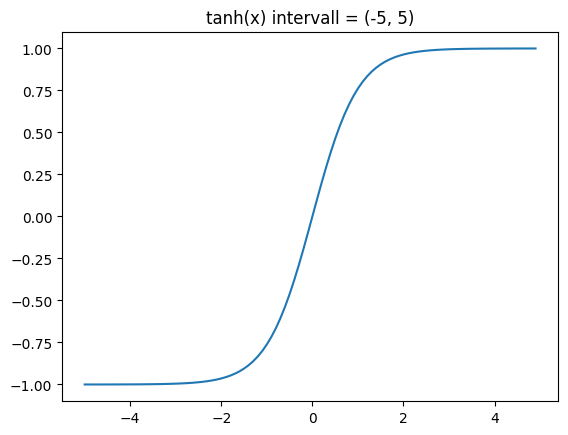

In [31]:
#Definition av tanh
def tanh(x):
    return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

x = np.arange(-5, 5, 0.1)
y = np.tanh(x)
plt.plot(x, y)
plt.title("tanh(x) intervall = (-5, 5)")

In [32]:
N = 16
#4 lager, varav 2st "gömda" med 16 neuroner.
model = torch.nn.Sequential(
    torch.nn.Linear(1,N), 
    torch.nn.Tanh(), 
    torch.nn.Linear(N,N), 
    torch.nn.Tanh(),
    torch.nn.Linear(N,N), 
    torch.nn.Tanh(),
    torch.nn.Linear(N,1)
    )

In [33]:
optimerare = torch.optim.Adam(model.parameters(), lr=1e-3)

#Träna modellen
fel_per_epok = träna(xdata, ydata, model, optimerare, epoker=epoker)

Omgång  0 , fel:  15.61767990887165
Omgång  50 , fel:  7.63415339589119
Omgång  100 , fel:  6.158557370305061
Omgång  150 , fel:  6.781227871775627
Omgång  200 , fel:  2.56439571082592
Fel sista epoken: 1.524221196770668


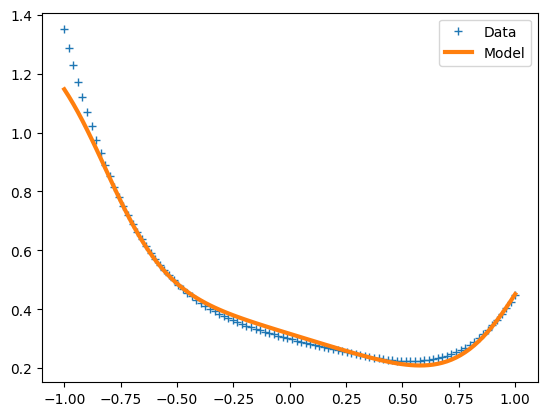

In [34]:
ymodel = []
for x in xdata:
    xtensor = torch.Tensor([x])
    ymodel.append(float(model(xtensor)))
                  
plt.plot(xdata, ydata, "+", label="Data")
plt.plot(xdata, ymodel, label="Model", linewidth=3)
plt.legend()

In [35]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 593


## Tips vid träning av neurala nätverk

### Plot över träning
<img src="../images/model_komplexitet.png" width=70%/>

* Mer träning minskar felet på träningsdatan men inte på testdatan - modellen överanpassas.
* Inget ni behöver tänka på här, men ofta tränar man med ett träningsset och samtidigt har koll på hur felet ser ut på testdata.

### Inlärningshastighetens påverkan på träningen
<img src="../images/learning_rate_vis.png" width=70%/>

* För hög inlärningshastighet gör att felet hoppar runt för mycket och vi lyckas inte konvergera.
* Kan också styra detta till viss del med större batch-size


### Större antal lager är inte alltid bättre
<img src="../images/antalet_lager.png" width=50%/>

* Desto fler lager desto svårare optimeringsproblem.

### Det finns många parametrar att hålla reda på vid träning av neurala nätverk.
* Dropout
* BatchNormalization
* Vikt-initialisering
* Transfer Learning
* Regularization
* Augmentering av data
* Normalisering av data